# Import and Setup

In [2]:
from readRinexObs import rinexobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [3]:
data = rinexobs("mah22800.15o")

mah22800.15o is a RINEX 2.11 file, 15777.532 kB.
16.02 seconds for _block2df
7.88 seconds for panel assignments
finished in 25.92 seconds


# Plotting

according to the Andrew Hansen's thesis equations (2.15) and (2.16):

$TEC = (P2-P1)/(f1^2/f2^2 - 1)$

ans

$TEC = -(L2-L1)/(f1^2/f^2 - 1)$

theoretically they should be the same

In [6]:
# sattelites in file
data.items

Int64Index([2, 3, 5, 6, 7, 8, 9, 12, 13, 16, 20, 21, 23, 25, 26, 27, 28, 29,
            30, 31, 32],
           dtype='int64')

In [7]:
# parameters in the file
# https://igscb.jpl.nasa.gov/igscb/data/format/rinex211.txt
# section 10.1.1 says what the letters mean
data.major_axis

Index(['C1', 'L1', 'S1', 'C2', 'L2', 'S2', 'P2', 'C5', 'L5', 'S5'], dtype='object')

15589.9678179


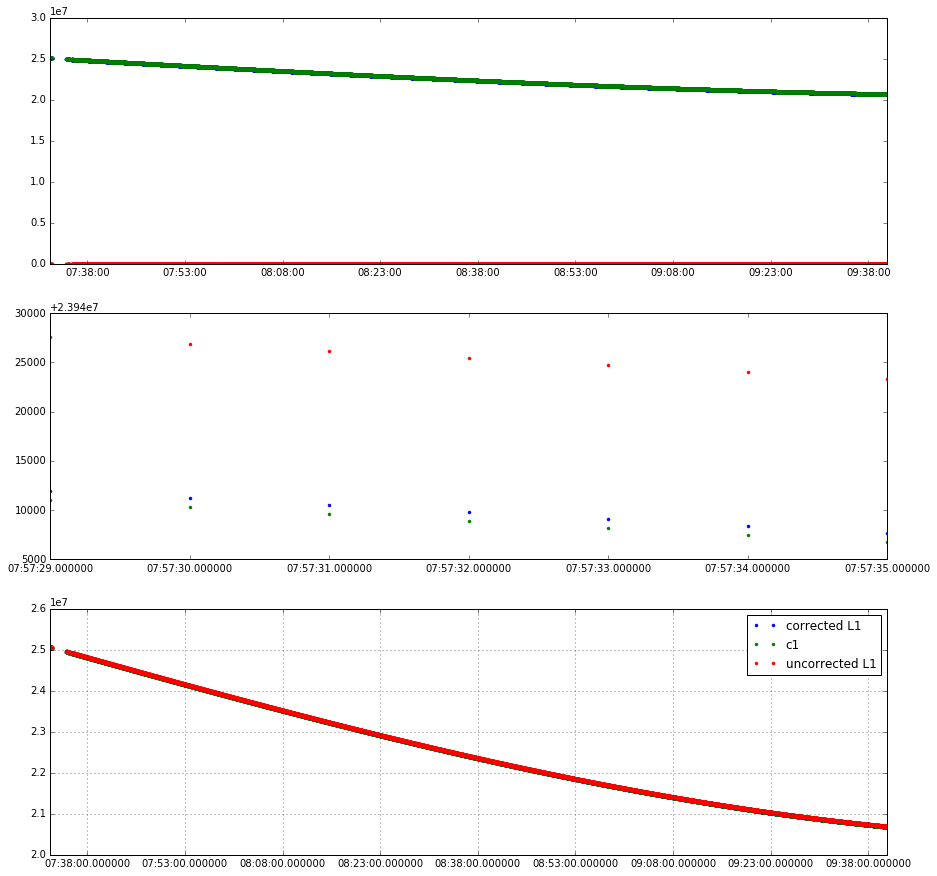

In [4]:
f1 = 1575.42E6 #MHz
f2 = 1227.6E6  #MHz
f5 = 1176.45E6 #MHz

sv_of_interest = 30

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
fmt = DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(fmt)

bias = data[:,sv_of_interest,'L1','data']*(3.0E8/f1)-data[:,sv_of_interest,'C1','data']

plt.plot(data[:,sv_of_interest,'C1','data'],'.',label='c1')
plt.plot(data[:,sv_of_interest,'L1','data']*(3.0E8/f1),'.',label='l1')
plt.plot(bias,'.',label='bias')

abias=np.average(bias[np.logical_not(np.isnan(bias))])
print(abias)

ax2=plt.subplot(312)
plt.plot(data[:,sv_of_interest,'L1','data'][6999:7006]*(3.0E8/f1)-abias,'.',label='corrected L1')
plt.plot(data[:,sv_of_interest,'C1','data'][6999:7006],'.',label='c1')
plt.plot(data[:,sv_of_interest,'L1','data'][6999:7006]*(3.0E8/f1),'.',label='uncorrected L1')

ax3=plt.subplot(313)
plt.plot(data[:,sv_of_interest,'L1','data']*(3.0E8/f1)-abias,'.',label='corrected L1')
plt.plot(data[:,sv_of_interest,'C1','data'],'.',label='c1')
plt.plot(data[:,sv_of_interest,'L1','data']*(3.0E8/f1),'.',label='uncorrected L1')


plt.legend()
plt.grid()
plt.show()





So the TEC is off by a large factor on the pseudorange graph, I'm not sure where that's coming from right now, I followed the equation from the thesis. The difference in pseudorange between the frequencies is very small, is that how its supposed to be and it needs to be multiplied by a constant? or is the data off? The file I used doesn't have P1 and P2, only P2, but I compared P2 to C2 and it is the same, so C1, C2 and C5 should work the same.

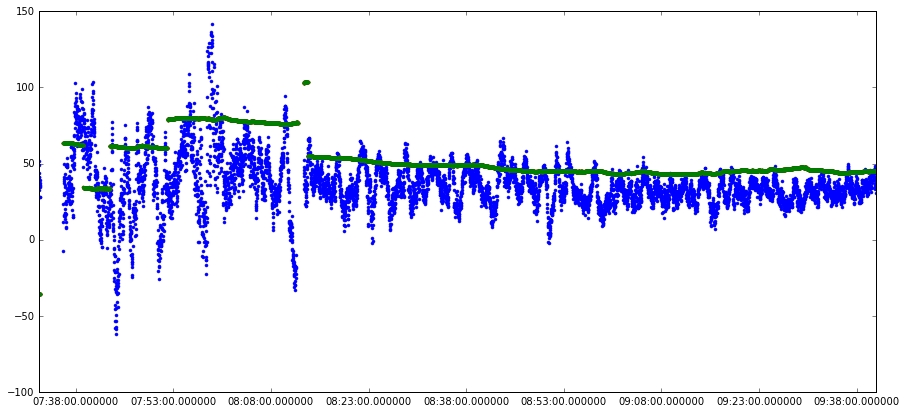

15589.9678179


In [9]:
fig2 = plt.figure(figsize = (15,15))
ax1=plt.subplot(211)
plt.plot(2.85*(data[:,sv_of_interest,'C2','data']*1.0E9/3.0E8
               -data[:,sv_of_interest,'C1','data']*1.0E9/3.0E8),'b.')
plt.plot(2.85*((data[:,sv_of_interest,'L1','data']*(3.0E8/f1)-abias)*1.0E9/3.0E8
         -(data[:,sv_of_interest,'L2','data']*(3.0E8/f2)-abias)*1.0E9/3.0E8),'r.')
plt.plot(2.85*((data[:,sv_of_interest,'L1','data']*1.0E9/f1)
         -(data[:,sv_of_interest,'L2','data']*1.0E9/f2)),'g.')


plt.show()

print(abias)